In [12]:
import tensorflow as tf
import numpy
import pandas as pd
import matplotlib.pyplot as plt
rng = numpy.random

In [27]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [28]:
# Training Data
#train_X=numpy.asarray([1,2,4,3,5])
#train_Y=numpy.asarray([1,3,3,2,5])
df = pd.read_csv('life.txt', names=['x','y'])
train_X = df['x']
train_Y = df['y']
n_samples = train_X.shape[0]

In [29]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [30]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [31]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [32]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 574.682434082 W= 15.488869 b= 11.273601
Epoch: 0100 cost= 479.189697266 W= 13.67215 b= 17.929972
Epoch: 0150 cost= 400.151336670 W= 11.94273 b= 23.971422
Epoch: 0200 cost= 334.574432373 W= 10.367087 b= 29.47436
Epoch: 0250 cost= 280.165161133 W= 8.931847 b= 34.486942
Epoch: 0300 cost= 235.022262573 W= 7.6245112 b= 39.05281
Epoch: 0350 cost= 197.567611694 W= 6.4337 b= 43.211784
Epoch: 0400 cost= 166.492050171 W= 5.348994 b= 47.0001
Epoch: 0450 cost= 140.709304810 W= 4.3609705 b= 50.450775
Epoch: 0500 cost= 119.318511963 W= 3.4610207 b= 53.593815
Epoch: 0550 cost= 101.569862366 W= 2.6412477 b= 56.456917
Epoch: 0600 cost= 86.844451904 W= 1.8945394 b= 59.06481
Epoch: 0650 cost= 74.627418518 W= 1.2143749 b= 61.440228
Epoch: 0700 cost= 64.490776062 W= 0.5948144 b= 63.604046
Epoch: 0750 cost= 56.080585480 W= 0.030456373 b= 65.57505
Epoch: 0800 cost= 49.103321075 W= -0.4835719 b= 67.37029
Epoch: 0850 cost= 43.315441132 W= -0.9517148 b= 69.005264
Epoch: 0900 cost= 38.511974335

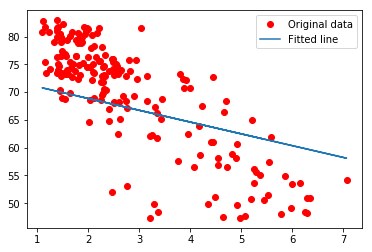

In [33]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()